# Importing libraries

In [1]:
!pip install textblob

In [2]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.simplefilter('ignore')
from itertools import chain
import collections
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Naren\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [6]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Naren\\Desktop\\pushpa_10610624\\final_12_aug_dataset.csv', encoding='unicode_escape')



In [7]:
df.head()

business_id  cool              date funny  \
0  0JtYKzRiG1Rad7nyhObEHQ   0.0   11/06/2019 2:50     0   
1  0JtYKzRiG1Rad7nyhObEHQ   0.0  30/10/2019 23:50     0   
2  0JtYKzRiG1Rad7nyhObEHQ   0.0   03/08/2019 0:43     0   
3  0JtYKzRiG1Rad7nyhObEHQ   0.0  16/07/2019 22:22     0   
4  0JtYKzRiG1Rad7nyhObEHQ   0.0   17/08/2019 3:49     0   

                review_id stars  \
0  podPIIwbo4IXmSKyCpHJBQ     5   
1  HejP9JMy9vKa3d2emg68xw     1   
2  IXRLaNXhSWnq8A6L8h-2yg     3   
3  yaf5UAGdHEb91O0RBovR2w     2   
4  do4jYLLSS-mohU3efbqNTw     1   

                                                text  useful  \
0  When I moved to New Orleans from Texas, I was ...     1.0   
1  Just not good.  Came into a mostly empty resta...     0.0   
2  Definitely not as good as their truck. Maybe t...     0.0   
3  Been to the food truck many times, and was exc...     1.0   
4  Sorry.  Love the truck.  Yall are terrible at ...     0.0   

                  user_id         address             name state  
0  vnPfZS98StIa0xIWjBdGBw  737 Octavia St  Taceaux Loceaux    LA  
1  n5SLJu3PksU_nNZYAjhheQ  737 Octavia St  Taceaux Loceaux    LA  
2  6cdrX8W-yCwEPNHnldUuTQ  737 Octavia St  Taceaux Loceaux    LA  
3  n4KCiWSqFxwO29URaoEk6w  737 Octavia St  Taceaux Loceaux    LA  
4  3M4qiL3ryBpFDRWgXimVvw  737 Octavia St  Taceaux Loceaux    LA

In [8]:
selected_columns = ['date', 'stars', 'text', 'address', 'name', 'state']
df = df[selected_columns]

In [9]:
df.head()
df.shape

(51046, 6)

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# If needed, drop rows with missing values
df.dropna(inplace=True)

In [11]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 44855 entries, 0 to 51045
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     44855 non-null  object
 1   stars    44855 non-null  object
 2   text     44855 non-null  object
 3   address  44855 non-null  object
 4   name     44855 non-null  object
 5   state    44855 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB
None
                    date  stars  \
count              44855  44855   
unique             44576      5   
top     12/05/2015 18:41      5   
freq                   3  21045   

                                                     text           address  \
count                                               44855             44855   
unique                                              44800                97   
top     I've never been more disrespected in my life, ...  724 Iberville St   
freq                                                    3       

# EDA


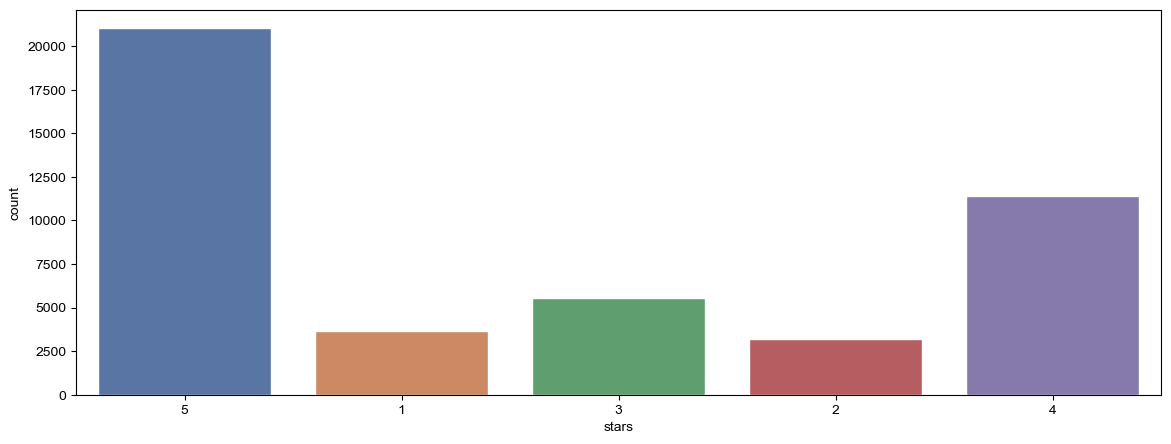

In [12]:
# Rating distribution 
fig, ax = plt.subplots()
sns.set(style="whitegrid")
fig.set_size_inches(14, 5)
ax = sns.countplot(x="stars", data=df)

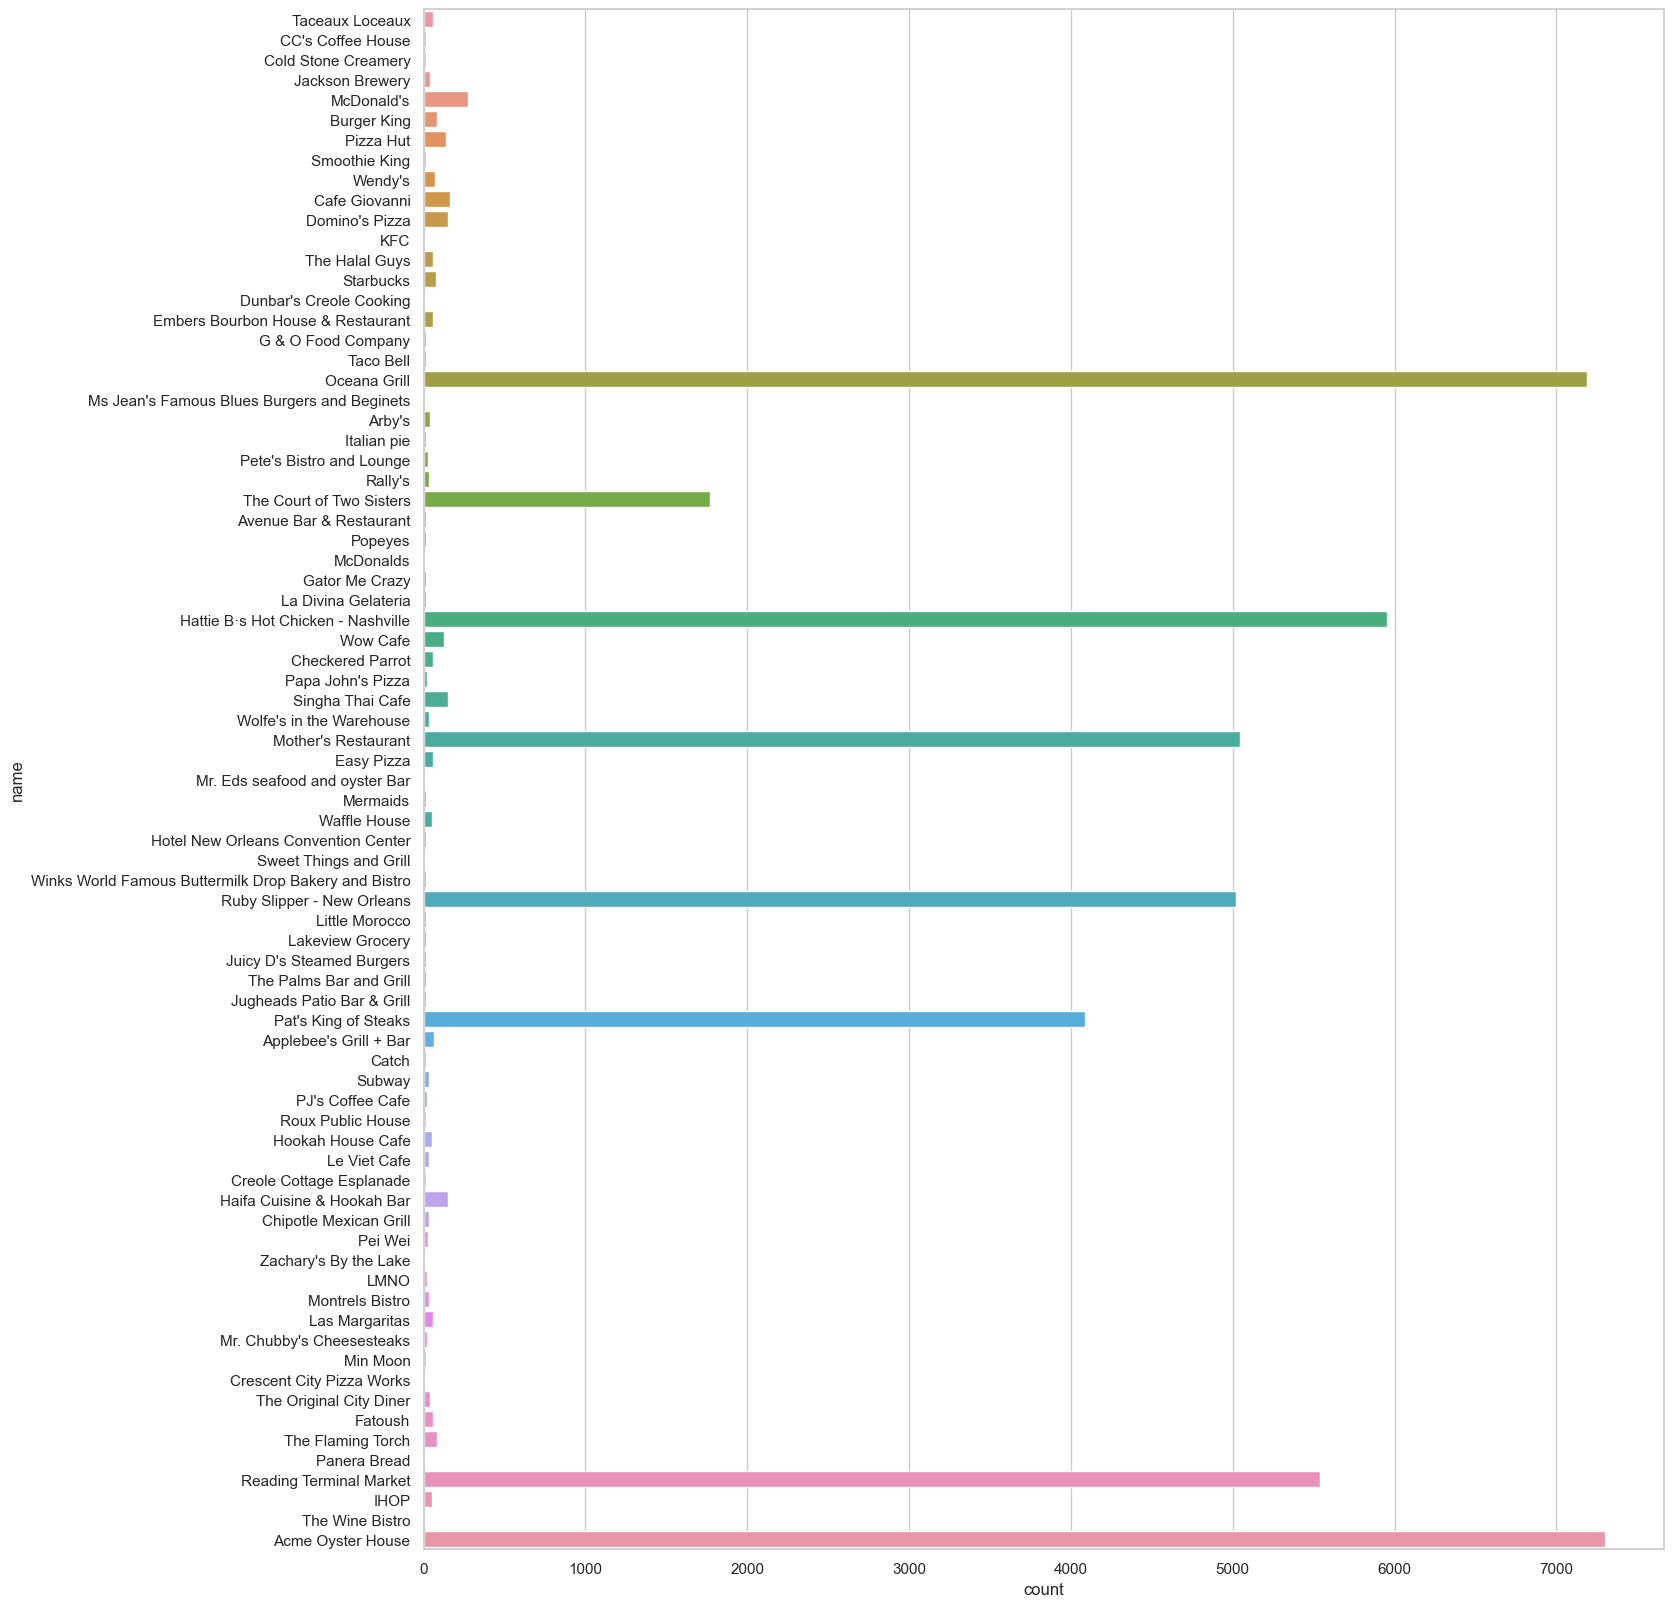

In [13]:
# Name of restaurants vs count
fig, ax = plt.subplots()
sns.set(style="whitegrid")
fig.set_size_inches(16, 20)
ax = sns.countplot(y="name", data=df)

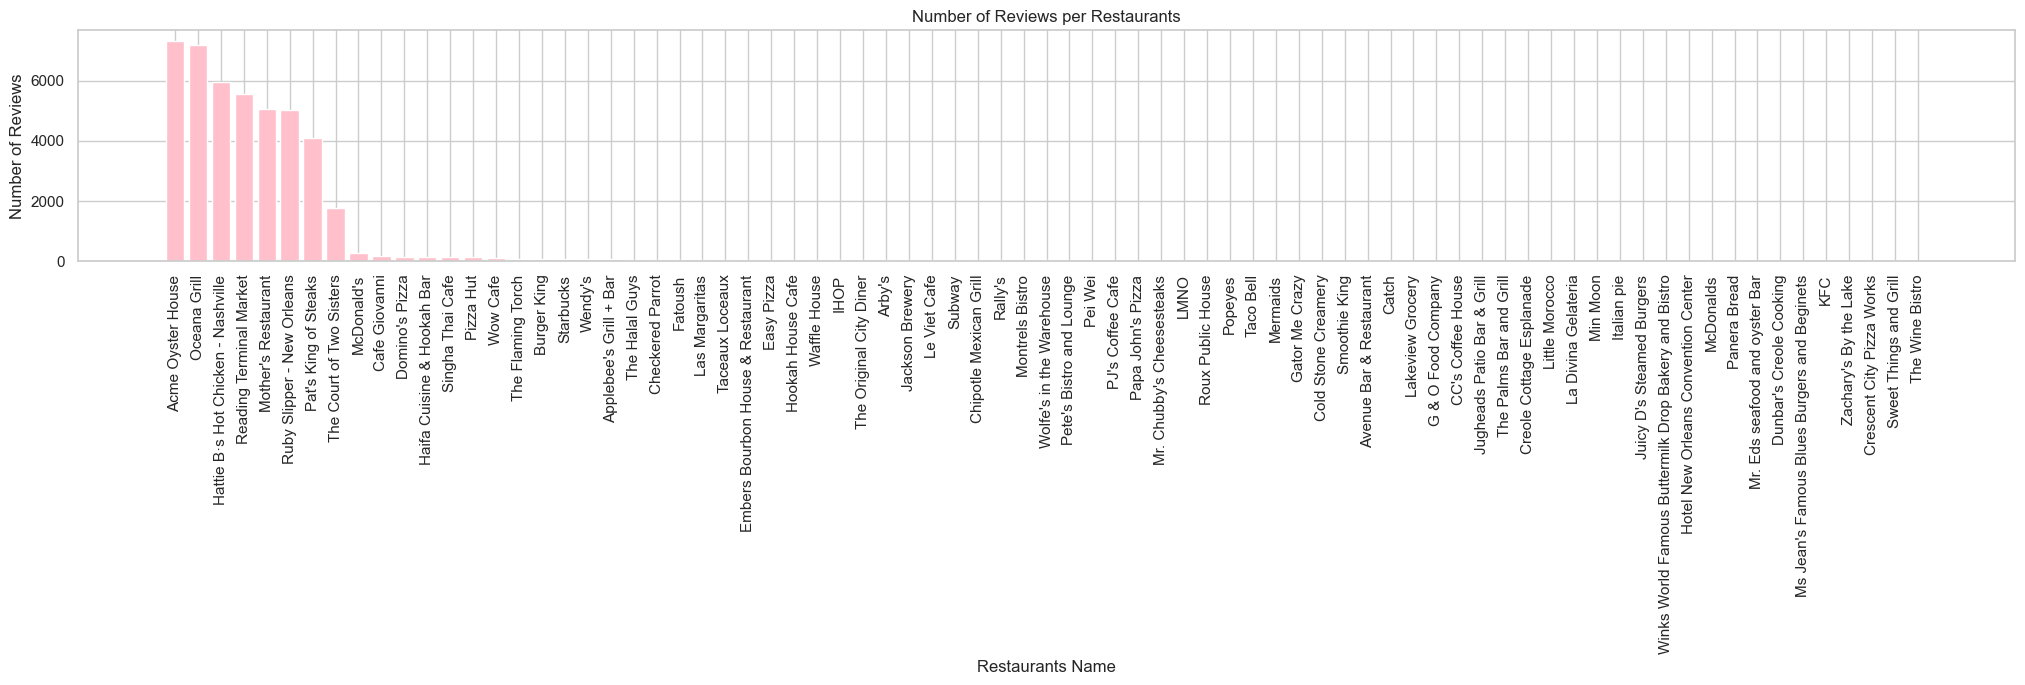

In [14]:
# Calculate the count of reviews for each Restaurants name in descending order
name_counts = df['name'].value_counts()

# Sort the Restaurants names by count in descending order
sorted_names = name_counts.index.tolist()


top_names = sorted_names[:5]
top_name_counts = name_counts[top_names]

# Adjust these values to control the distance between bars
bar_width = 0.5  # Width of each bar
bar_spacing = 150000000000000000000000000 # Spacing between bars

# Create a bar plot
plt.figure(figsize=(25, 3))
plt.bar(sorted_names, name_counts, color='pink')
plt.xticks(rotation=90)
plt.xlabel('Restaurants Name')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Restaurants')
#plt.tight_layout()

# Show the plot
plt.show()

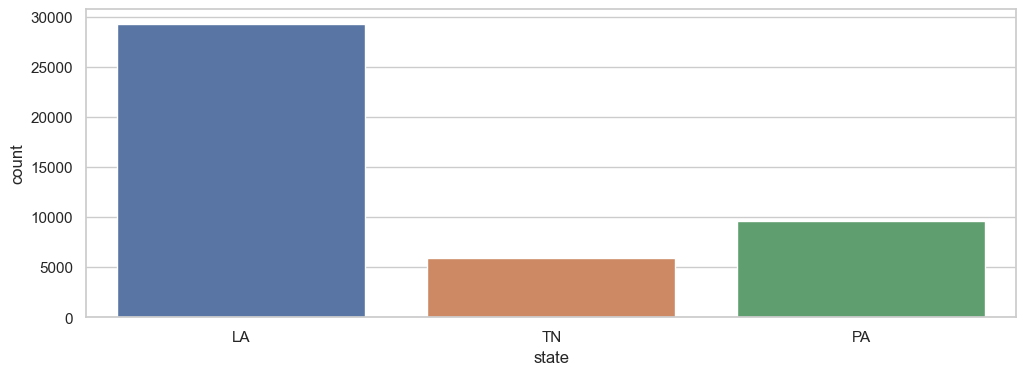

In [15]:
# Statewise count  of reviews
fig, ax = plt.subplots()
sns.set(style="whitegrid")
fig.set_size_inches(12, 4)
ax = sns.countplot(x="state", data=df)

# Calculating number of words in each review

In [16]:
train = df
train['word_count'] = train['text'].apply(lambda x: len(str(x).split(" ")))
train[['text','word_count']].head()

text  word_count
0  When I moved to New Orleans from Texas, I was ...          61
1  Just not good.  Came into a mostly empty resta...          62
2  Definitely not as good as their truck. Maybe t...          26
3  Been to the food truck many times, and was exc...         172
4  Sorry.  Love the truck.  Yall are terrible at ...          74

# Calculating number of characters in each review

In [17]:
train['char_count'] = train['text'].str.len() ## this also includes spaces
train[['text','char_count']].head()

text  char_count
0  When I moved to New Orleans from Texas, I was ...         360
1  Just not good.  Came into a mostly empty resta...         301
2  Definitely not as good as their truck. Maybe t...         132
3  Been to the food truck many times, and was exc...         889
4  Sorry.  Love the truck.  Yall are terrible at ...         344

In [18]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['text'].apply(lambda x: avg_word(x))
train[['text','avg_word']].head()

text  avg_word
0  When I moved to New Orleans from Texas, I was ...  4.806452
1  Just not good.  Came into a mostly empty resta...  4.210526
2  Definitely not as good as their truck. Maybe t...  4.115385
3  Been to the food truck many times, and was exc...  4.351515
4  Sorry.  Love the truck.  Yall are terrible at ...  4.234375

# Calculating number of special tags

In [19]:
train['Special_Tags'] = train['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['text','Special_Tags']].head()

text  Special_Tags
0  When I moved to New Orleans from Texas, I was ...             0
1  Just not good.  Came into a mostly empty resta...             0
2  Definitely not as good as their truck. Maybe t...             0
3  Been to the food truck many times, and was exc...             0
4  Sorry.  Love the truck.  Yall are terrible at ...             0

# Calculating number of digits in the review text -if any

In [20]:
train['numerics'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['text','numerics']].head()

text  numerics
0  When I moved to New Orleans from Texas, I was ...         0
1  Just not good.  Came into a mostly empty resta...         3
2  Definitely not as good as their truck. Maybe t...         1
3  Been to the food truck many times, and was exc...         0
4  Sorry.  Love the truck.  Yall are terrible at ...         2

# Replacing special characters with empty spaces

In [21]:
train['Text_New'] = train['text'].str.replace('[^\w\s]','')
train['Text_New'].head()

<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
C:\Users\Naren\AppData\Local\Temp\ipykernel_29812\1815996306.py:1: DeprecationWarning: invalid escape sequence '\w'
  train['Text_New'] = train['text'].str.replace('[^\w\s]','')


0    When I moved to New Orleans from Texas, I was ...
1    Just not good.  Came into a mostly empty resta...
2    Definitely not as good as their truck. Maybe t...
3    Been to the food truck many times, and was exc...
4    Sorry.  Love the truck.  Yall are terrible at ...
Name: Text_New, dtype: object

# Text reviews after removal of special characters

In [22]:
df.Text_New = train['Text_New']
df.head()

date stars                                               text  \
0   11/06/2019 2:50     5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50     1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43     3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22     2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49     1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  
0             0         0  When I moved to New Orleans from Texas, I was ...  
1             0         3  Just not good.  Came into a mostly empty resta...  
2             0         1  Definitely not as good as their truck. Maybe t...  
3             0         0  Been to the food truck many times, and was exc...  
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...

In [23]:
df.head()

date stars                                               text  \
0   11/06/2019 2:50     5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50     1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43     3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22     2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49     1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  
0             0         0  When I moved to New Orleans from Texas, I was ...  
1             0         3  Just not good.  Came into a mostly empty resta...  
2             0         1  Definitely not as good as their truck. Maybe t...  
3             0         0  Been to the food truck many times, and was exc...  
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...

# Saving the text as strings

In [24]:
df['Text_New'] = df['Text_New'].astype(str)

# Removing stopwords, punctuations and normalizing

In [25]:
stop = set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

def clean(text):
    stop_free= ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

# Cleaned Text

In [26]:
df['Text_New_Clean'] = df['Text_New'].apply(clean)
df.head()

date stars                                               text  \
0   11/06/2019 2:50     5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50     1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43     3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22     2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49     1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  \
0             0         0  When I moved to New Orleans from Texas, I was ...   
1             0         3  Just not good.  Came into a mostly empty resta...   
2             0         1  Definitely not as good as their truck. Maybe t...   
3             0         0  Been to the food truck many times, and was exc...   
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...   

                                      Text_New_Clean  
0  [moved, new, orleans, texas, skeptical, would,...  
1  [good, came, mostly, empty, restaurant, still,...  
2  [definitely, good, truck, maybe, still, need, ...  
3  [food, truck, many, time, excited, try, brick,...  
4  [sorry, love, truck, yall, terrible, brick, n,...

# Creating a dictionary from the cleaned text

In [27]:
from gensim import corpora
dictionary = corpora.Dictionary(df['Text_New_Clean'])
print(dictionary.num_nnz)

1802942


In [28]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['Text_New_Clean']]
print(len(doc_term_matrix))

44855


In [ ]:
lda = gensim.models.ldamodel.LdaModel
num_topics = 10
%time ldamodel = lda(doc_term_matrix, num_topics = num_topics, id2word=dictionary, passes=50, minimum_probability=0)
ldamodel.print_topics(num_topics=num_topics)

In [29]:
!pip install -U textblob
!python -m textblob.download_corpora

In [30]:
df1 = df['Text_New']
df1

0        When I moved to New Orleans from Texas, I was ...
1        Just not good.  Came into a mostly empty resta...
2        Definitely not as good as their truck. Maybe t...
3        Been to the food truck many times, and was exc...
4        Sorry.  Love the truck.  Yall are terrible at ...
                               ...                        
51041    Located in Walmart Well the service   1 cashie...
51042    Stale buns that fall apart as you are eating t...
51043    I wish I could give 0 stars. Rude and in carin...
51044    food sucks worse than other McDonalds the mana...
51045    The workers themselves were not bad, but one w...
Name: Text_New, Length: 44855, dtype: object

In [31]:
texts = df['Text_New']
texts.head()

0    When I moved to New Orleans from Texas, I was ...
1    Just not good.  Came into a mostly empty resta...
2    Definitely not as good as their truck. Maybe t...
3    Been to the food truck many times, and was exc...
4    Sorry.  Love the truck.  Yall are terrible at ...
Name: Text_New, dtype: object

In [32]:
new_stopwords1 = ["I", "this", "my", "i",
                 "are", "the", "Im", "i", "My", "is", "and", "it", "im", "boy","he", "she",
                 "was", "were", "to", "get", "on", "also", "0", "1", "2"]

In [33]:
stop = nltk.corpus.stopwords.words('english')
stop.extend(new_stopwords1)
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

def clean(text):
    stop_free= ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [34]:
df['Text_New_Clean_1'] = df['Text_New'].apply(clean)
df

date stars  \
0       11/06/2019 2:50     5   
1      30/10/2019 23:50     1   
2       03/08/2019 0:43     3   
3      16/07/2019 22:22     2   
4       17/08/2019 3:49     1   
...                 ...   ...   
51041  14/12/2019 15:09     1   
51042  05/11/2018 18:38     1   
51043  15/02/2020 23:37     1   
51044   05/02/2017 3:36     1   
51045  05/02/2021 23:55     2   

                                                    text  \
0      When I moved to New Orleans from Texas, I was ...   
1      Just not good.  Came into a mostly empty resta...   
2      Definitely not as good as their truck. Maybe t...   
3      Been to the food truck many times, and was exc...   
4      Sorry.  Love the truck.  Yall are terrible at ...   
...                                                  ...   
51041  Located in Walmart Well the service   1 cashie...   
51042  Stale buns that fall apart as you are eating t...   
51043  I wish I could give 0 stars. Rude and in carin...   
51044  food sucks worse than other McDonalds the mana...   
51045  The workers themselves were not bad, but one w...   

                     address             name state  word_count  char_count  \
0             737 Octavia St  Taceaux Loceaux    LA          61         360   
1             737 Octavia St  Taceaux Loceaux    LA          62         301   
2             737 Octavia St  Taceaux Loceaux    LA          26         132   
3             737 Octavia St  Taceaux Loceaux    LA         172         889   
4             737 Octavia St  Taceaux Loceaux    LA          74         344   
...                      ...              ...   ...         ...         ...   
51041  1901 Tchoupitoulas St       McDonald's    LA         123         607   
51042  1901 Tchoupitoulas St       McDonald's    LA          49         270   
51043  1901 Tchoupitoulas St       McDonald's    LA          60         323   
51044  1901 Tchoupitoulas St       McDonald's    LA          32         170   
51045  1901 Tchoupitoulas St       McDonald's    LA          26         154   

       avg_word  Special_Tags  numerics  \
0      4.806452             0         0   
1      4.210526             0         3   
2      4.115385             0         1   
3      4.351515             0         0   
4      4.234375             0         2   
...         ...           ...       ...   
51041  4.181034             0         8   
51042  4.530612             0         0   
51043  4.457627             0         1   
51044  4.343750             0         0   
51045  4.961538             0         0   

                                                Text_New  \
0      When I moved to New Orleans from Texas, I was ...   
1      Just not good.  Came into a mostly empty resta...   
2      Definitely not as good as their truck. Maybe t...   
3      Been to the food truck many times, and was exc...   
4      Sorry.  Love the truck.  Yall are terrible at ...   
...                                                  ...   
51041  Located in Walmart Well the service   1 cashie...   
51042  Stale buns that fall apart as you are eating t...   
51043  I wish I could give 0 stars. Rude and in carin...   
51044  food sucks worse than other McDonalds the mana...   
51045  The workers themselves were not bad, but one w...   

                                          Text_New_Clean  \
0      [moved, new, orleans, texas, skeptical, would,...   
1      [good, came, mostly, empty, restaurant, still,...   
2      [definitely, good, truck, maybe, still, need, ...   
3      [food, truck, many, time, excited, try, brick,...   
4      [sorry, love, truck, yall, terrible, brick, n,...   
...                                                  ...   
51041  [located, walmart, well, service, 1, cashier, ...   
51042  [stale, bun, fall, apart, eating, cashier, scr...   
51043  [wish, could, give, 0, star, rude, caring, see...   
51044  [food, suck, worse, mcdonalds, manager, grunt,...   
51045  [worker, bad, one, wear, mask, nose, think, sh.

In [35]:
df.to_csv('New_Data_Final_2.csv')

In [36]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
df.to_csv(r'C:\Users\Naren\Desktop\pushpa_10610624\New_Data_Final_2.csv', index=False)

In [37]:
DF2 = pd.read_csv('New_Data_Final_2.csv')
DF2.head()

date  stars                                               text  \
0   11/06/2019 2:50      5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50      1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43      3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22      2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49      1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  \
0             0         0  When I moved to New Orleans from Texas, I was ...   
1             0         3  Just not good.  Came into a mostly empty resta...   
2             0         1  Definitely not as good as their truck. Maybe t...   
3             0         0  Been to the food truck many times, and was exc...   
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...   

                                      Text_New_Clean  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...   
1  ['good', 'came', 'mostly', 'empty', 'restauran...   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...   
3  ['food', 'truck', 'many', 'time', 'excited', '...   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...   

                                    Text_New_Clean_1  
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...  
1  ['good', 'came', 'mostly', 'empty', 'restauran...  
2  ['definitely', 'good', 'truck', 'maybe', 'stil...  
3  ['food', 'truck', 'many', 'time', 'excited', '...  
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...

In [38]:
texts = DF2['Text_New_Clean_1']

In [39]:
vocab = sorted(set(word for sentence in texts for word in sentence.split()))
print(len(vocab), vocab)

49756 ["'0',", "'0']", "'00',", "'000',", "'0000',", "'0007',", "'002',", "'003',", "'010',", "'0100']", "'010421',", "'01092013',", "'012319',", "'02',", "'0220',", "'025',", "'03',", "'0306',", "'03072011',", "'03092017',", "'031336',", "'031366']", "'035',", "'04',", "'0430',", "'05',", "'050',", "'0500',", "'050819',", "'06',", "'06']", "'06252015',", "'07',", "'071313',", "'0730',", "'0745',", "'075',", "'08',", "'0800',", "'09',", "'09']", "'090',", "'0900',", "'0930']", "'095',", "'0955',", "'099',", "'0o',", "'1',", "'1']", "'10',", "'10']", "'100',", "'100']", "'1000',", "'1000']", "'10000',", "'100000',", "'100000']", "'10001',", "'1000am',", "'1000per',", "'1000pm',", "'1000x',", "'1001',", "'100100',", "'100120',", "'100130',", "'100200',", "'100am',", "'100degree',", "'100k',", "'100kyear',", "'100lb',", "'100lbs',", "'100m',", "'100p',", "'100pm',", "'100th',", "'100x',", "'101',", "'101']", "'1010',", "'1010']", "'1010just',", "'1011',", "'1012',", "'1012am',", "'1013201

In [40]:
def binary_transform(text):
    # create a vector with all entries as 0
    output = np.zeros(len(vocab))
    # tokenize the input
    words = set(text.split())
    # for every word in vocab check if the doc contains it
    for i, v in enumerate(vocab):
        output[i] = v in words
    return output

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=True)
vec.fit(texts)
print([w for w in sorted(vec.vocabulary_.keys())])

['00', '000', '0000', '0007', '002', '003', '010', '0100', '010421', '01092013', '012319', '02', '0220', '025', '03', '0306', '03072011', '03092017', '031336', '031366', '035', '04', '0430', '05', '050', '0500', '050819', '06', '06252015', '07', '071313', '0730', '0745', '075', '08', '0800', '08092011', '08112011', '081921', '09', '090', '0900', '0930', '095', '0955', '099', '0o', '10', '100', '1000', '10000', '100000', '10001', '1000am', '1000per', '1000pm', '1000x', '1001', '100100', '100120', '100130', '100200', '100am', '100degree', '100k', '100kyear', '100lb', '100lbs', '100m', '100p', '100pm', '100th', '100x', '101', '1010', '1010just', '1011', '1012', '1012am', '10132018', '1013a', '1014', '101413', '1015', '101516', '1015min', '1015minutes', '1015person', '1016', '1019', '101get', '102', '1020', '1020am', '102111', '10218', '102316', '1025', '102518', '1028', '1029', '102909', '10292016', '102932', '102degrees', '102hrs', '103', '1030', '103011', '10301100am', '103011ami', '103

In [42]:
#
corpus=[]
new= DF2['Text_New_Clean_1'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:50]

    top_n_bigrams=_get_top_ngram(text,n)[:50]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

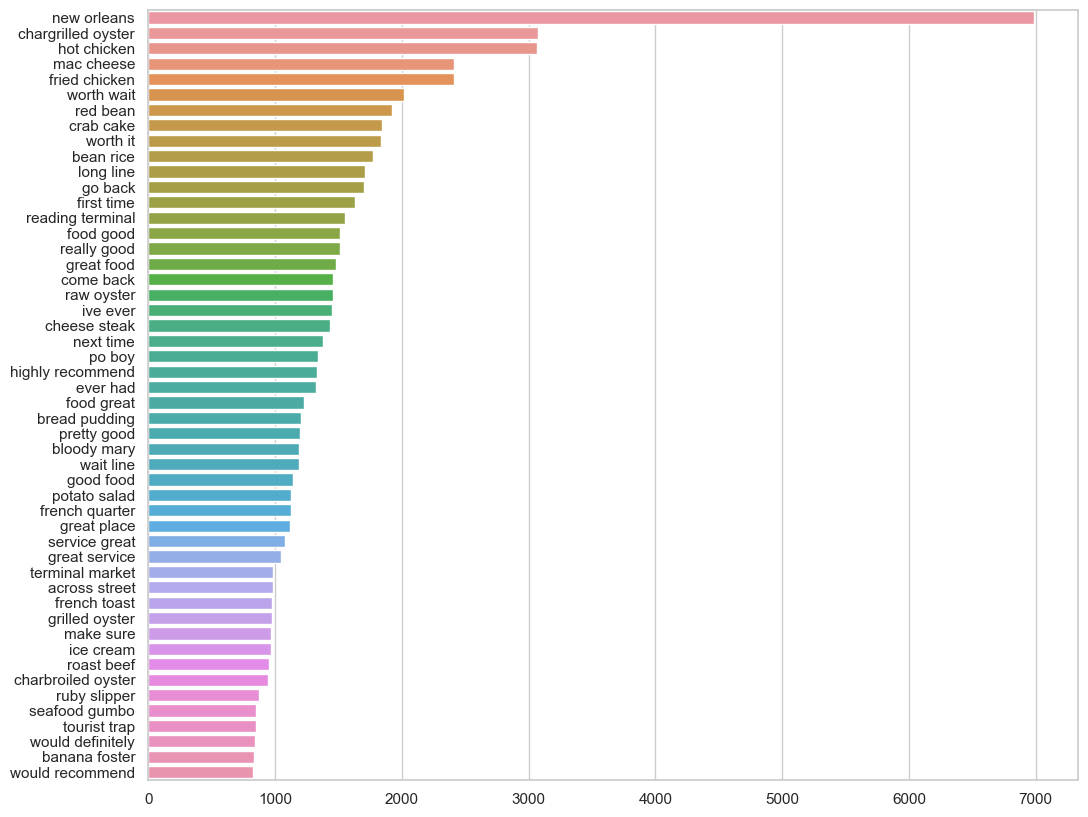

In [43]:
fig, ax = plt.subplots(figsize=(12,10))
plot_top_ngrams_barchart(DF2['Text_New_Clean_1'],2)

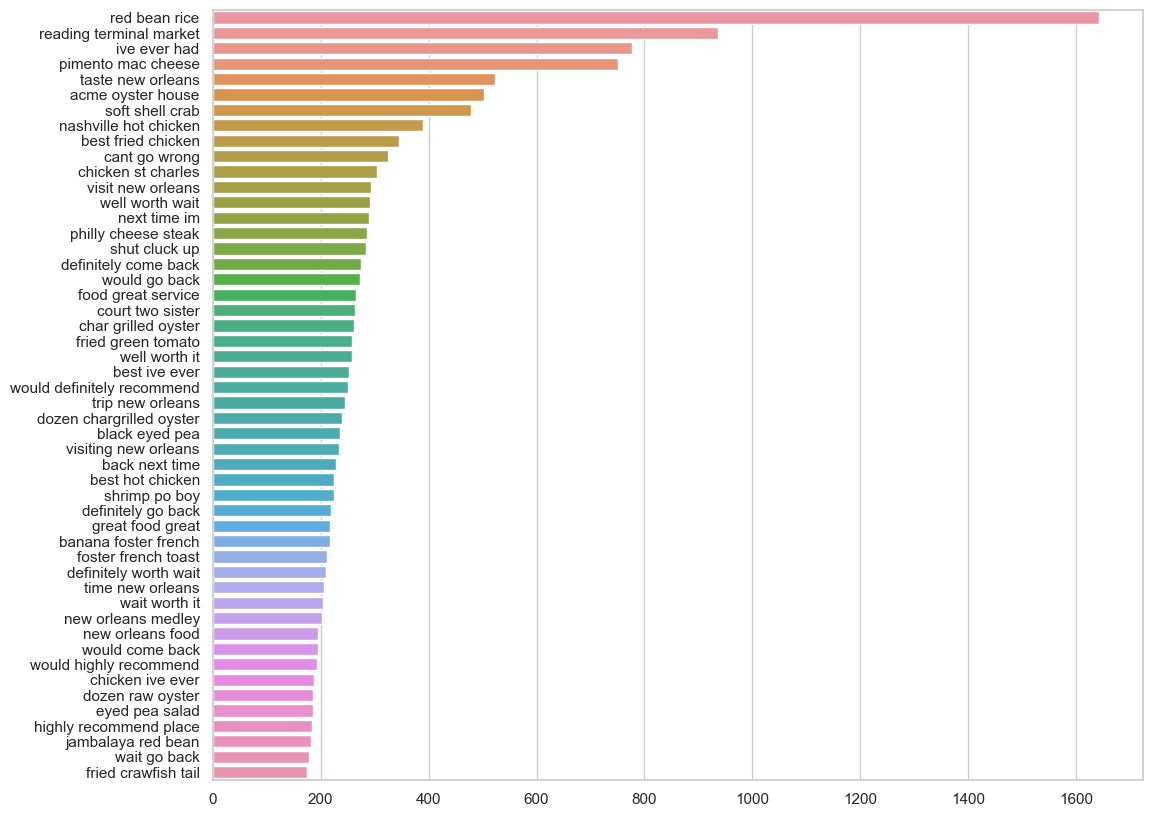

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
plot_top_ngrams_barchart(DF2['Text_New_Clean_1'],3)

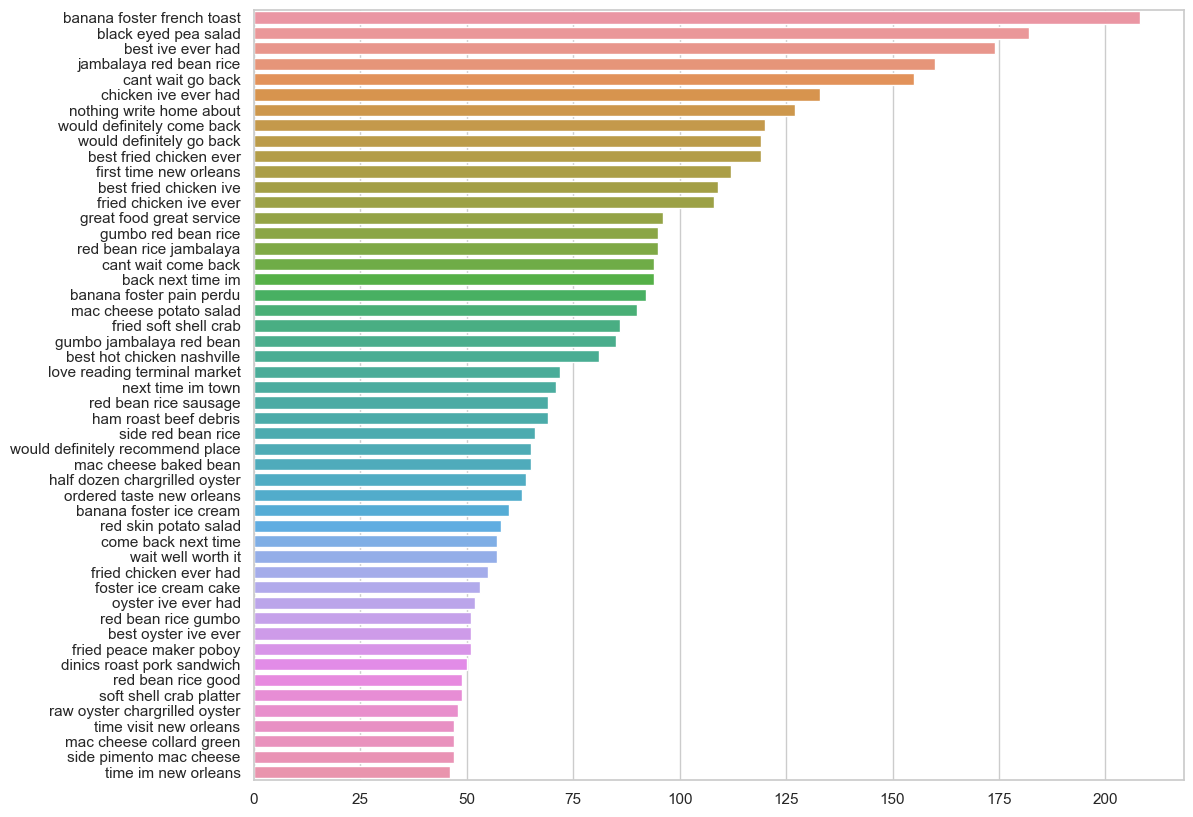

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
plot_top_ngrams_barchart(DF2['Text_New_Clean_1'],4)

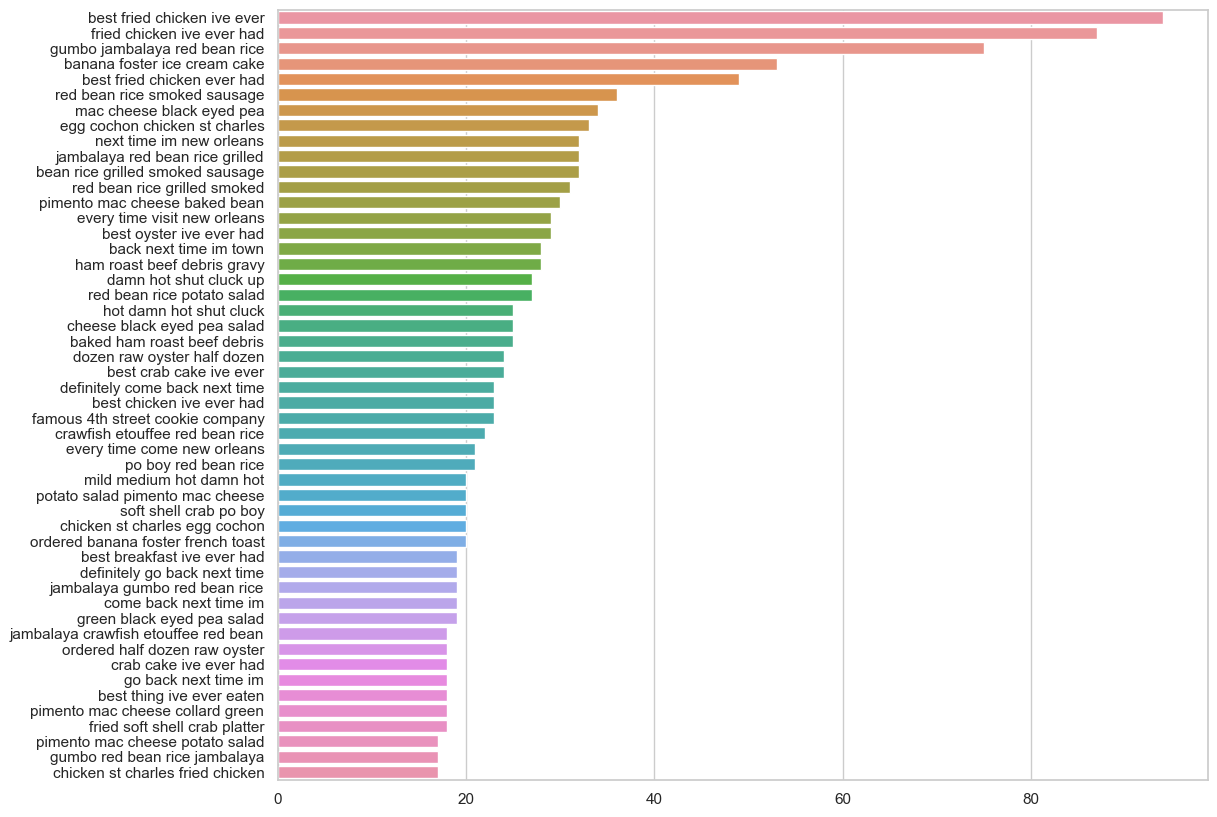

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
plot_top_ngrams_barchart(DF2['Text_New_Clean_1'],5)

In [47]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
DF2['sentiment_score'] = DF2['stars'].map(sentiment_score)
DF2['sentiment'] = DF2['sentiment_score'].map(sentiment)

DF2.head()

date  stars                                               text  \
0   11/06/2019 2:50      5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50      1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43      3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22      2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49      1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  \
0             0         0  When I moved to New Orleans from Texas, I was ...   
1             0         3  Just not good.  Came into a mostly empty resta...   
2             0         1  Definitely not as good as their truck. Maybe t...   
3             0         0  Been to the food truck many times, and was exc...   
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...   

                                      Text_New_Clean  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...   
1  ['good', 'came', 'mostly', 'empty', 'restauran...   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...   
3  ['food', 'truck', 'many', 'time', 'excited', '...   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...   

                                    Text_New_Clean_1  sentiment_score  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...                1   
1  ['good', 'came', 'mostly', 'empty', 'restauran...                0   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...                0   
3  ['food', 'truck', 'many', 'time', 'excited', '...                0   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...                0   

  sentiment  
0  POSITIVE  
1  NEGATIVE  
2  NEGATIVE  
3  NEGATIVE  
4  NEGATIVE

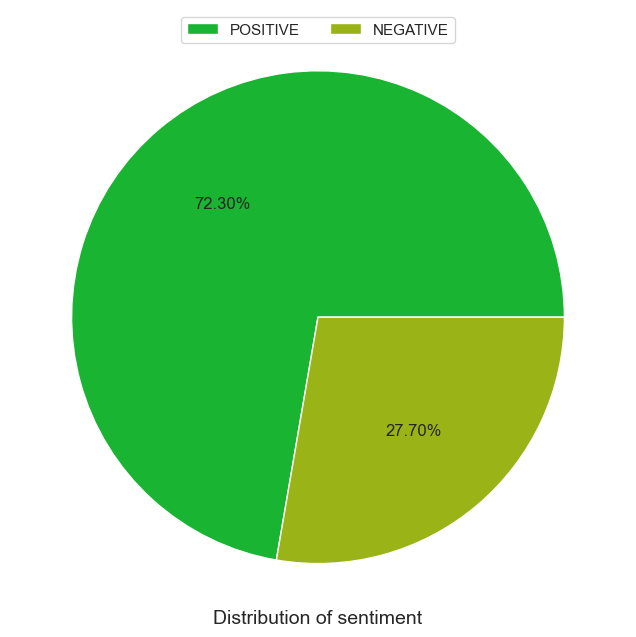

In [48]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#18b432', '#9ab418']
plt.pie(DF2['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast


In [51]:
# Create defaultdicts to store word frequencies

positive_word_freq = defaultdict(int)
negative_word_freq = defaultdict(int)

# Iterate through the DataFrame rows
print(DF2.columns)
for index, row in DF2.iterrows():

    words_array_str = row['Text_New_Clean']

    #print("------1")
    #print(sentiment_score)
    try:
        #print("-------1.5")
        words_array = ast.literal_eval(words_array_str)  # Convert string to list
        #words_array = words_array_str
        #print("--------2")
        #print(words_array)
        #print('--------3')
        #print("-------4")
        sentiment = row['sentiment']

        #print(sentiment)
        
        for word in words_array:
            if sentiment == 'POSITIVE':
                positive_word_freq[word] += 1
                #print(word)
            elif sentiment == 'NEGATIVE':
                negative_word_freq[word] += 1
                
    except ValueError:
        # Handle cases where the conversion to list fails
        pass
    




Index(['date', 'stars', 'text', 'address', 'name', 'state', 'word_count',
       'char_count', 'avg_word', 'Special_Tags', 'numerics', 'Text_New',
       'Text_New_Clean', 'Text_New_Clean_1', 'sentiment_score', 'sentiment'],
      dtype='object')


In [52]:
positive_word_freq

defaultdict(int,
            {'moved': 548,
             'new': 6279,
             'orleans': 5354,
             'texas': 101,
             'skeptical': 77,
             'would': 6021,
             'able': 898,
             'find': 2042,
             'good': 16740,
             'creative': 49,
             'taco': 84,
             'taceaux': 4,
             'loceaux': 4,
             'never': 1919,
             'disappointed': 907,
             'me': 1558,
             'nearly': 175,
             'everything': 3745,
             'menu': 2157,
             'tasty': 1855,
             'especially': 945,
             'recommend': 3762,
             'kermits': 2,
             'barbecue': 72,
             'messin': 8,
             'brisket': 93,
             'avocado': 55,
             'fry': 2907,
             'amazeballs': 19,
             'also': 6342,
             'delicious': 7506,
             'add': 604,
             'order': 5351,
             'vegan': 114,
             'option': 16

In [53]:
from collections import defaultdict
import ast

positive_word_freq = defaultdict(int)
negative_word_freq = defaultdict(int)

print(df.columns)

# Iterate through the DataFrame rows
for index, row in DF2.iterrows():
    words_array_str = row['Text_New_Clean']
    
    try:
        words_array = ast.literal_eval(words_array_str)  # Convert string to list
        sentiment = row['sentiment']
        
        for word in words_array:
            if sentiment == 'POSITIVE':
                positive_word_freq[word] += 1
            elif sentiment == 'NEGATIVE':
                negative_word_freq[word] += 1
                
    except ValueError:
        # Handle cases where the conversion to list fails
        pass

# Print list of positive words and their frequencies
for word, freq in positive_word_freq.items():
    print(f"Word: {word}, Frequency: {freq}")

Index(['date', 'stars', 'text', 'address', 'name', 'state', 'word_count',
       'char_count', 'avg_word', 'Special_Tags', 'numerics', 'Text_New',
       'Text_New_Clean', 'Text_New_Clean_1'],
      dtype='object')
Word: moved, Frequency: 548
Word: new, Frequency: 6279
Word: orleans, Frequency: 5354
Word: texas, Frequency: 101
Word: skeptical, Frequency: 77
Word: would, Frequency: 6021
Word: able, Frequency: 898
Word: find, Frequency: 2042
Word: good, Frequency: 16740
Word: creative, Frequency: 49
Word: taco, Frequency: 84
Word: taceaux, Frequency: 4
Word: loceaux, Frequency: 4
Word: never, Frequency: 1919
Word: disappointed, Frequency: 907
Word: me, Frequency: 1558
Word: nearly, Frequency: 175
Word: everything, Frequency: 3745
Word: menu, Frequency: 2157
Word: tasty, Frequency: 1855
Word: especially, Frequency: 945
Word: recommend, Frequency: 3762
Word: kermits, Frequency: 2
Word: barbecue, Frequency: 72
Word: messin, Frequency: 8
Word: brisket, Frequency: 93
Word: avocado, Frequency:

C:\Users\Naren\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\Naren\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


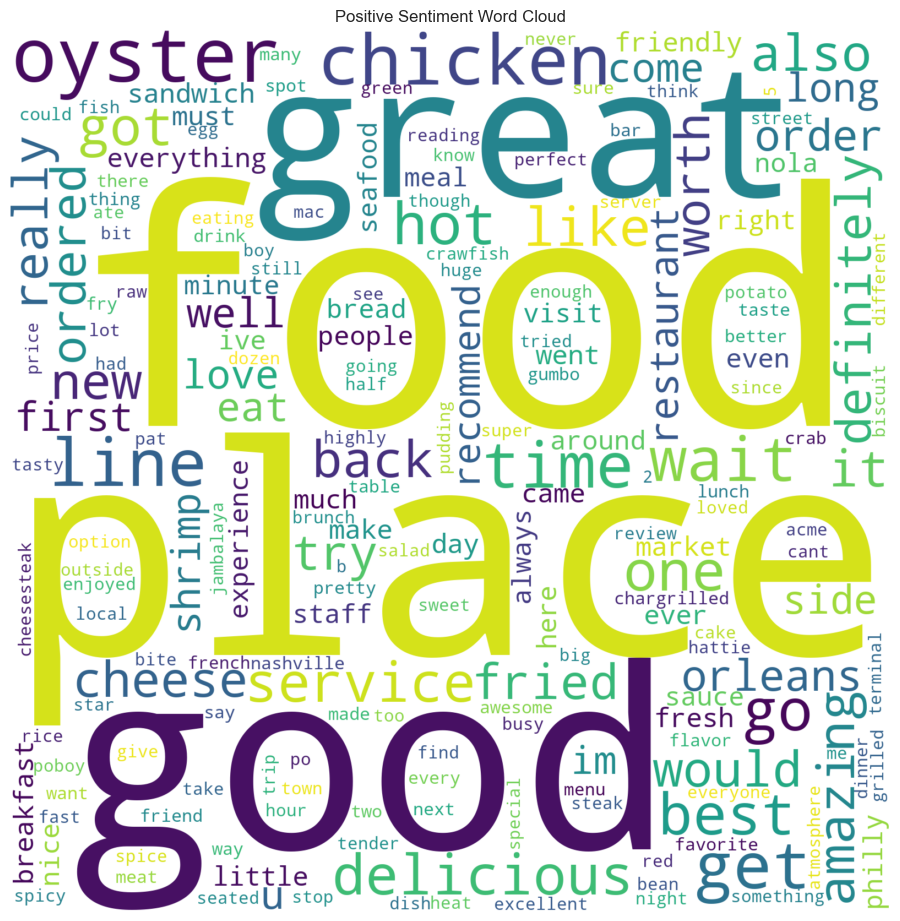

In [54]:
# Create word clouds
positive_wordcloud = WordCloud(width=1600, height=1600, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=1600, height=1600, background_color='white').generate_from_frequencies(negative_word_freq)

# Display positive word clouds
plt.figure(figsize=(25,14 ))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()



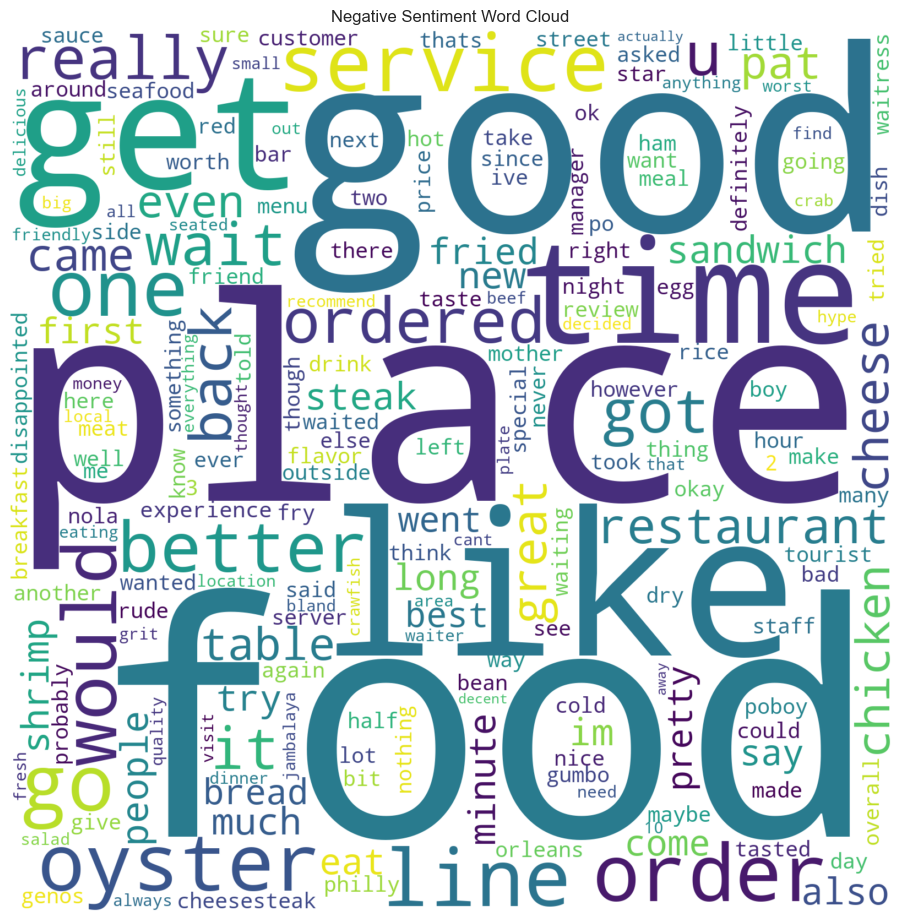

In [55]:

# Display negative word clouds
plt.figure(figsize=(25, 14))
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

In [63]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(DF2,
                                           DF2["stars"]):
    df2_train = DF2.reindex(train_index)
    df2_test = DF2.reindex(test_index)

In [64]:
len(df2_train),len(df2_test)

(35884, 8971)

In [65]:
df2_train["stars"].value_counts()/len(df2_train)

stars
5    0.469178
4    0.253790
3    0.123370
1    0.081986
2    0.071675
Name: count, dtype: float64

In [66]:
df2_test["stars"].value_counts()/len(df2_test)

stars
5    0.469178
4    0.253818
3    0.123398
1    0.081931
2    0.071675
Name: count, dtype: float64

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.svm import LinearSVC

In [68]:
# Prepare data for classification
X = DF2['Text_New_Clean_1']
y = DF2['sentiment_score']

In [69]:
# Convert text to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()


In [70]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [71]:
print("Naive Bayes:")
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

Naive Bayes:
Accuracy: 0.8146249024634935
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.43      0.56      2479
           1       0.82      0.96      0.88      6492

    accuracy                           0.81      8971
   macro avg       0.81      0.70      0.72      8971
weighted avg       0.81      0.81      0.79      8971

Confusion Matrix:
[[1062 1417]
 [ 246 6246]]


In [72]:
print("Implementing NBC.....")
# Implementing Naive Bayes Classifier
nbc_clf = MultinomialNB()

# Running cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(X_tfidf, y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, y_train = X_tfidf[train_index], y.iloc[train_index]
    X_test, y_test = X_tfidf[test_index], y.iloc[test_index]
    nbc_clf.fit(X_train, y_train) # Fitting NBC
    Y_pred = nbc_clf.predict(X_test)
    score = metrics.accuracy_score(y_test, Y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
nbc_mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", nbc_mean_accuracy)

Implementing NBC.....
Iteration  1
Cross-validation accuracy:  0.8149799375835934
Iteration  2
Cross-validation accuracy:  0.8189924208649131
Iteration  3
Cross-validation accuracy:  0.8143111903700401
Iteration  4
Cross-validation accuracy:  0.8252340615247437
Iteration  5
Cross-validation accuracy:  0.8234507356219349
Iteration  6
Cross-validation accuracy:  0.8258639910813824
Iteration  7
Cross-validation accuracy:  0.8066889632107024
Iteration  8
Cross-validation accuracy:  0.8245261984392419
Iteration  9
Cross-validation accuracy:  0.8191750278706801
Iteration  10
Cross-validation accuracy:  0.8055741360089186
Mean cross-validation accuracy:  0.8178796662576151


In [73]:
# Support Vector Machine (SVM)
print("Support Vector Machine (SVM):")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

Support Vector Machine (SVM):
Accuracy: 0.8617614269788183
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1243
           1       0.88      0.93      0.91      3242

    accuracy                           0.86      4485
   macro avg       0.84      0.80      0.82      4485
weighted avg       0.86      0.86      0.86      4485

Confusion Matrix:
[[ 842  401]
 [ 219 3023]]


In [74]:
print("Implementing SVC.....")
# Implementing Support Vector Classifier
svc_clf = LinearSVC() # kernel = 'linear' and C = 1

# Running cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(X_tfidf, y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, y_train = X_tfidf[train_index], y.iloc[train_index]
    X_test, y_test = X_tfidf[test_index], y.iloc[test_index]
    svc_clf.fit(X_train, y_train) # Fitting SVC
    y_pred = svc_clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
svc_mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", svc_mean_accuracy)

Implementing SVC.....
Iteration  1
Cross-validation accuracy:  0.8651359786000892
Iteration  2
Cross-validation accuracy:  0.8762817654926438
Iteration  3
Cross-validation accuracy:  0.8655818100757914
Iteration  4
Cross-validation accuracy:  0.8724921979491752
Iteration  5
Cross-validation accuracy:  0.8689255461435578
Iteration  6
Cross-validation accuracy:  0.8717948717948718
Iteration  7
Cross-validation accuracy:  0.8633221850613155
Iteration  8
Cross-validation accuracy:  0.8711259754738016
Iteration  9
Cross-validation accuracy:  0.8713489409141583
Iteration  10
Cross-validation accuracy:  0.8617614269788183
Mean cross-validation accuracy:  0.8687770698484224


In [75]:
# Random Forest
print("Random Forest:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


Random Forest:
Accuracy: 0.8490523968784839
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1243
           1       0.86      0.95      0.90      3242

    accuracy                           0.85      4485
   macro avg       0.84      0.77      0.79      4485
weighted avg       0.85      0.85      0.84      4485

Confusion Matrix:
[[ 736  507]
 [ 170 3072]]


In [76]:
print("Random Forest:")
# Implementing Naive Bayes Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Running cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(X_tfidf, y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, y_train = X_tfidf[train_index], y.iloc[train_index]
    X_test, y_test = X_tfidf[test_index], y.iloc[test_index]
    nbc_clf.fit(X_train, y_train) # Fitting NBC
    Y_pred = nbc_clf.predict(X_test)
    score = metrics.accuracy_score(y_test, Y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
nbc_mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", nbc_mean_accuracy)

Random Forest:
Iteration  1
Cross-validation accuracy:  0.8149799375835934
Iteration  2
Cross-validation accuracy:  0.8189924208649131
Iteration  3
Cross-validation accuracy:  0.8143111903700401
Iteration  4
Cross-validation accuracy:  0.8252340615247437
Iteration  5
Cross-validation accuracy:  0.8234507356219349
Iteration  6
Cross-validation accuracy:  0.8258639910813824
Iteration  7
Cross-validation accuracy:  0.8066889632107024
Iteration  8
Cross-validation accuracy:  0.8245261984392419
Iteration  9
Cross-validation accuracy:  0.8191750278706801
Iteration  10
Cross-validation accuracy:  0.8055741360089186
Mean cross-validation accuracy:  0.8178796662576151


In [77]:
# Logistic Regression
print("Logistic Regression:")
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

Logistic Regression:
Accuracy: 0.8617614269788183
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1243
           1       0.88      0.93      0.91      3242

    accuracy                           0.86      4485
   macro avg       0.84      0.80      0.82      4485
weighted avg       0.86      0.86      0.86      4485

Confusion Matrix:
[[ 837  406]
 [ 214 3028]]


In [78]:
# Logistic Regression
print("Logistic Regression:")
# Implementing   Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Running cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(X_tfidf, y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, y_train = X_tfidf[train_index], y.iloc[train_index]
    X_test, y_test = X_tfidf[test_index], y.iloc[test_index]
    nbc_clf.fit(X_train, y_train) # Fitting NBC
    Y_pred = nbc_clf.predict(X_test)
    score = metrics.accuracy_score(y_test, Y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score) # appending cross-validation accuracy for each iteration
nbc_mean_accuracy = np.mean(scores)
print("Mean cross-validation accuracy: ", nbc_mean_accuracy)

Logistic Regression:
Iteration  1
Cross-validation accuracy:  0.8149799375835934
Iteration  2
Cross-validation accuracy:  0.8189924208649131
Iteration  3
Cross-validation accuracy:  0.8143111903700401
Iteration  4
Cross-validation accuracy:  0.8252340615247437
Iteration  5
Cross-validation accuracy:  0.8234507356219349
Iteration  6
Cross-validation accuracy:  0.8258639910813824
Iteration  7
Cross-validation accuracy:  0.8066889632107024
Iteration  8
Cross-validation accuracy:  0.8245261984392419
Iteration  9
Cross-validation accuracy:  0.8191750278706801
Iteration  10
Cross-validation accuracy:  0.8055741360089186
Mean cross-validation accuracy:  0.8178796662576151


In [79]:
# Normalize confusion matrices
cm_nb_normalized = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]
#cm_svm_normalized = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]
cm_rf_normalized = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
cm_lr_normalized = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]


In [80]:
# Define the class labels
class_labels = ['Positive', 'Negative']

# '1' - positive, '0' - Negative

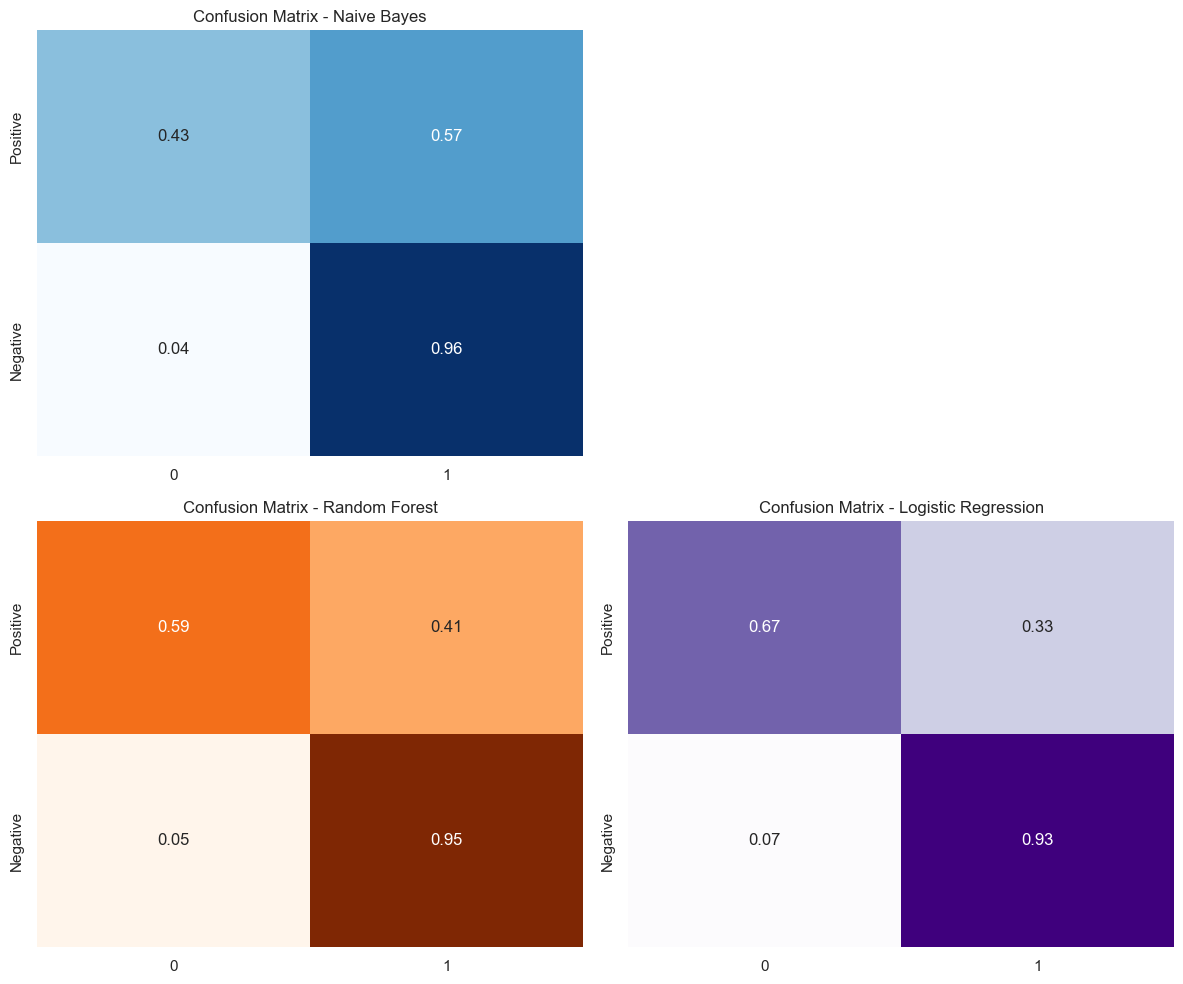

In [81]:
# Plot Confusion Matrices with normalized values and custom labels
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(cm_nb_normalized, annot=True, cmap='Blues', cbar=False, fmt=".2f", yticklabels=class_labels)
plt.title("Confusion Matrix - Naive Bayes")

#plt.subplot(2, 2, 2)
#sns.heatmap(cm_svm_normalized, annot=True, cmap='Greens', cbar=False, fmt=".2f", yticklabels=class_labels)
#plt.title("Confusion Matrix - Support Vector Machine")

plt.subplot(2, 2, 3)
sns.heatmap(cm_rf_normalized, annot=True, cmap='Oranges', cbar=False, fmt=".2f", yticklabels=class_labels)
plt.title("Confusion Matrix - Random Forest")

plt.subplot(2, 2, 4)
sns.heatmap(cm_lr_normalized, annot=True, cmap='Purples', cbar=False, fmt=".2f", yticklabels=class_labels)
plt.title("Confusion Matrix - Logistic Regression")

plt.tight_layout()
plt.show()

# Reviews Based Sentiment Analysis and Machine learning based modeling and Hybrid modelling

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.simplefilter('ignore')
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter

In [99]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Naren\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [100]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [101]:
sia = SentimentIntensityAnalyzer()

In [102]:
DF2.head()

date  stars                                               text  \
0   11/06/2019 2:50      5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50      1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43      3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22      2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49      1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  \
0             0         0  When I moved to New Orleans from Texas, I was ...   
1             0         3  Just not good.  Came into a mostly empty resta...   
2             0         1  Definitely not as good as their truck. Maybe t...   
3             0         0  Been to the food truck many times, and was exc...   
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...   

                                      Text_New_Clean  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...   
1  ['good', 'came', 'mostly', 'empty', 'restauran...   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...   
3  ['food', 'truck', 'many', 'time', 'excited', '...   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...   

                                    Text_New_Clean_1  sentiment_score  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...                1   
1  ['good', 'came', 'mostly', 'empty', 'restauran...                0   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...                0   
3  ['food', 'truck', 'many', 'time', 'excited', '...                0   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...                0   

  sentiment  sentiment_scoreR sentimentR  
0  POSITIVE            0.9108   positive  
1  NEGATIVE           -0.8836   negative  
2  NEGATIVE            0.0757   negative  
3  NEGATIVE            0.1531   negative  
4  NEGATIVE           -0.0003   negative

In [103]:
DF2['sentiment_scoreR'] = DF2['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [104]:
DF2['sentimentR'] = DF2['sentiment_scoreR'].apply(lambda score: 'positive' if score > 0.5 
                                                  else 'negative')

In [105]:
DF2.head()

date  stars                                               text  \
0   11/06/2019 2:50      5  When I moved to New Orleans from Texas, I was ...   
1  30/10/2019 23:50      1  Just not good.  Came into a mostly empty resta...   
2   03/08/2019 0:43      3  Definitely not as good as their truck. Maybe t...   
3  16/07/2019 22:22      2  Been to the food truck many times, and was exc...   
4   17/08/2019 3:49      1  Sorry.  Love the truck.  Yall are terrible at ...   

          address             name state  word_count  char_count  avg_word  \
0  737 Octavia St  Taceaux Loceaux    LA          61         360  4.806452   
1  737 Octavia St  Taceaux Loceaux    LA          62         301  4.210526   
2  737 Octavia St  Taceaux Loceaux    LA          26         132  4.115385   
3  737 Octavia St  Taceaux Loceaux    LA         172         889  4.351515   
4  737 Octavia St  Taceaux Loceaux    LA          74         344  4.234375   

   Special_Tags  numerics                                           Text_New  \
0             0         0  When I moved to New Orleans from Texas, I was ...   
1             0         3  Just not good.  Came into a mostly empty resta...   
2             0         1  Definitely not as good as their truck. Maybe t...   
3             0         0  Been to the food truck many times, and was exc...   
4             0         2  Sorry.  Love the truck.  Yall are terrible at ...   

                                      Text_New_Clean  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...   
1  ['good', 'came', 'mostly', 'empty', 'restauran...   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...   
3  ['food', 'truck', 'many', 'time', 'excited', '...   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...   

                                    Text_New_Clean_1  sentiment_score  \
0  ['moved', 'new', 'orleans', 'texas', 'skeptica...                1   
1  ['good', 'came', 'mostly', 'empty', 'restauran...                0   
2  ['definitely', 'good', 'truck', 'maybe', 'stil...                0   
3  ['food', 'truck', 'many', 'time', 'excited', '...                0   
4  ['sorry', 'love', 'truck', 'yall', 'terrible',...                0   

  sentiment  sentiment_scoreR sentimentR  
0  POSITIVE            0.9108   positive  
1  NEGATIVE           -0.8836   negative  
2  NEGATIVE            0.0757   negative  
3  NEGATIVE            0.1531   negative  
4  NEGATIVE           -0.0003   negative

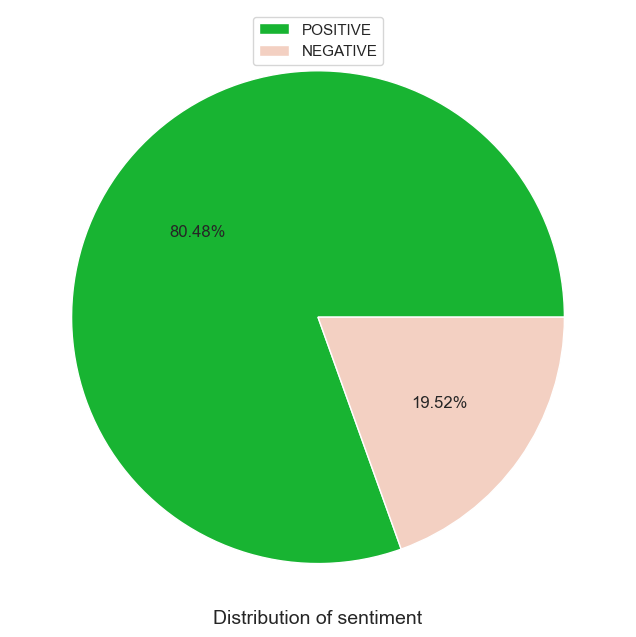

In [106]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE','NEGATIVE']
colors = ['#18b432',  '#f3d0c2']
plt.pie(DF2['sentimentR'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=1, loc=9)
plt.show()

In [107]:
X = DF2['Text_New_Clean_1']
y = DF2['sentimentR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [108]:
# Build and train a machine learning model (Naive Bayes in this example)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

    negative       0.76      0.27      0.40      1750
    positive       0.85      0.98      0.91      7221

    accuracy                           0.84      8971
   macro avg       0.80      0.62      0.65      8971
weighted avg       0.83      0.84      0.81      8971



In [109]:
# Support Vector Machine (SVM)
print("Support Vector Machine (SVM):")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

Support Vector Machine (SVM):
Accuracy: 0.8933229294393045
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.61      0.69      1750
    positive       0.91      0.96      0.94      7221

    accuracy                           0.89      8971
   macro avg       0.85      0.78      0.81      8971
weighted avg       0.89      0.89      0.89      8971

Confusion Matrix:
[[1059  691]
 [ 266 6955]]


In [110]:
# Random Forest
print("Random Forest:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Random Forest:
Accuracy: 0.8594359603165757
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.33      0.48      1750
    positive       0.86      0.99      0.92      7221

    accuracy                           0.86      8971
   macro avg       0.86      0.66      0.70      8971
weighted avg       0.86      0.86      0.83      8971

Confusion Matrix:
[[ 578 1172]
 [  89 7132]]


In [114]:
# Logistic Regression
print("Logistic Regression:")
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

Logistic Regression:
Accuracy: 0.8915394047486345
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.56      0.67      1750
    positive       0.90      0.97      0.94      7221

    accuracy                           0.89      8971
   macro avg       0.87      0.77      0.80      8971
weighted avg       0.89      0.89      0.88      8971

Confusion Matrix:
[[ 978  772]
 [ 201 7020]]


# Machine Learning algorithms based Hybrid modeling Approach

In [135]:
X = DF2['Text_New_Clean_1']
y = DF2['sentimentR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [136]:
# Build base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', C=1.0)
nb_model = MultinomialNB()

In [137]:
# Train base models
rf_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [138]:
# Make predictions using base models
rf_predictions = rf_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)
nb_predictions = nb_model.predict(X_test_tfidf)

In [139]:
# Hybrid Algorithm: RFNB (Random Forest + Naive Bayes)
hybrid_rf_nb_predictions = []
for rf_pred, nb_pred in zip(rf_predictions, nb_predictions):
    # Use voting strategy: If both models predict Positive, then predict Positive; otherwise, use NB's prediction
    if rf_pred == 'Positive' and nb_pred == 'Positive':
        hybrid_rf_nb_predictions.append('Positive')
    else:
        hybrid_rf_nb_predictions.append(nb_pred)

# Calculate accuracy for hybrid RFNB model
accuracy_rf_nb = accuracy_score(y_test, hybrid_rf_nb_predictions)
print("RFNB Hybrid Model Accuracy:", accuracy_rf_nb)

# Calculate classification report for the hybrid RFNB model
report_rf_nb = classification_report(y_test, hybrid_rf_nb_predictions, target_names=['negative', 'positive'])
print("RFNB Hybrid Model Classification Report:")
print(report_rf_nb)

RFNB Hybrid Model Accuracy: 0.8407089510645414
RFNB Hybrid Model Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.27      0.40      1750
    positive       0.85      0.98      0.91      7221

    accuracy                           0.84      8971
   macro avg       0.80      0.62      0.65      8971
weighted avg       0.83      0.84      0.81      8971



In [140]:
# Hybrid Algorithm: SVMNB (SVM + Naive Bayes)
hybrid_svm_nb_predictions = []
for svm_pred, nb_pred in zip(svm_predictions, nb_predictions):
    # Use voting strategy: If both models predict Positive, then predict Positive; otherwise, use NB's prediction
    if svm_pred == 'Positive' and nb_pred == 'Positive':
        hybrid_svm_nb_predictions.append('Positive')
    else:
        hybrid_svm_nb_predictions.append(nb_pred)

# Calculate accuracy for hybrid SVMNB model
accuracy_svm_nb = accuracy_score(y_test, hybrid_svm_nb_predictions)
print("SVMNB Hybrid Model Accuracy:", accuracy_svm_nb)

# Calculate classification report for the hybrid SVMNB model
report_svm_nb = classification_report(y_test, hybrid_svm_nb_predictions, target_names=['negative', 'positive'])
print("SVMNB Hybrid Model Classification Report:")
print(report_svm_nb)

SVMNB Hybrid Model Accuracy: 0.8407089510645414
SVMNB Hybrid Model Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.27      0.40      1750
    positive       0.85      0.98      0.91      7221

    accuracy                           0.84      8971
   macro avg       0.80      0.62      0.65      8971
weighted avg       0.83      0.84      0.81      8971



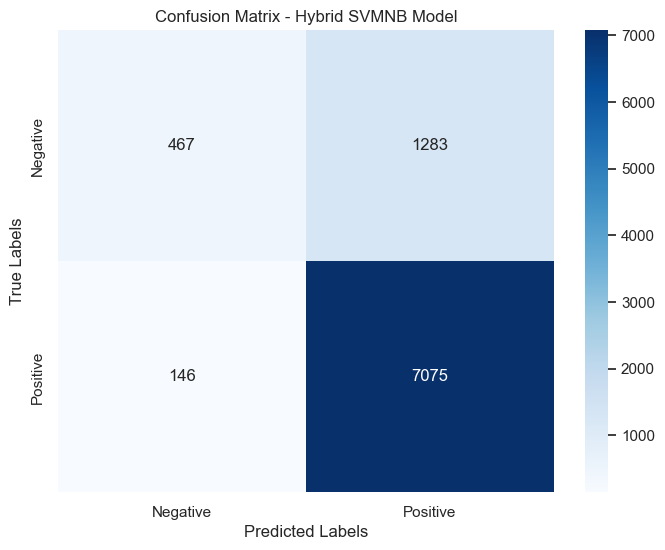

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix_svm_nb = confusion_matrix(y_test, hybrid_svm_nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Hybrid SVMNB Model')
plt.show()


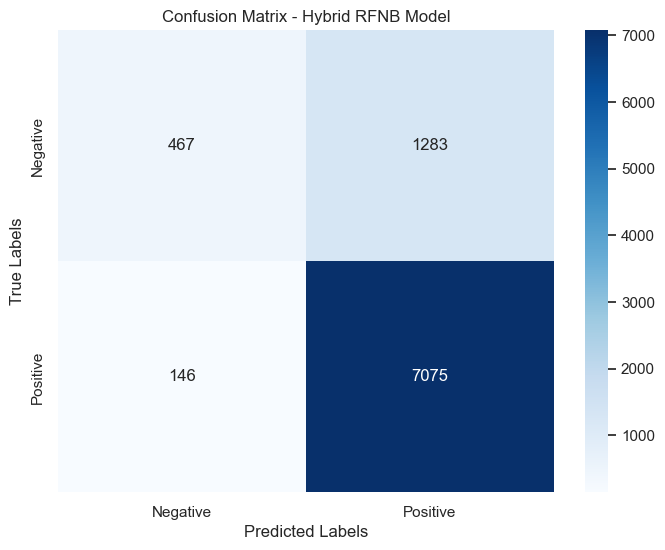

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix_rf_nb = confusion_matrix(y_test, hybrid_rf_nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Hybrid RFNB Model')
plt.show()
